In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import matplotlib.dates as mdates
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    #用来正常显示负号

%matplotlib inline

In [161]:
import warnings
warnings.filterwarnings('ignore')

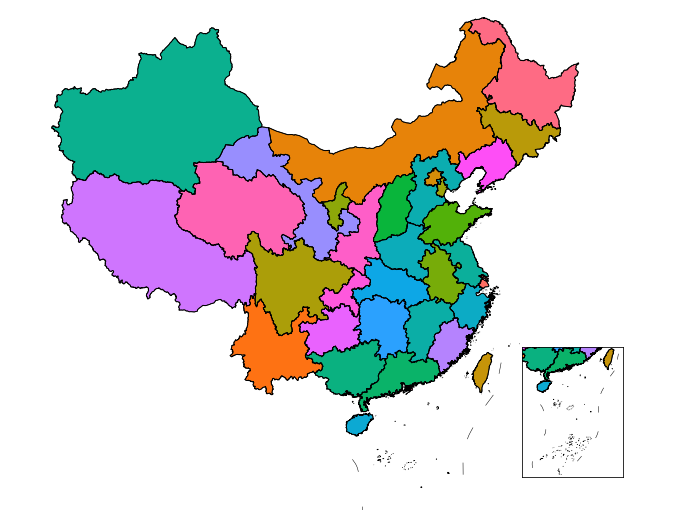

In [177]:

fig = plt.figure(figsize=(12,12))
ax = fig.gca()

basemap = Basemap(llcrnrlon= 80,llcrnrlat=10,urcrnrlon=150,urcrnrlat=50,projection='poly',lon_0 = 116.65,lat_0 = 40.02,ax = ax)
basemap.readshapefile(shapefile = 'C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china',
                      name = "province", drawbounds=True)
basemap.readshapefile('C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china_nine_dotted_line',
                       name ='section', drawbounds=True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')


df_mapData = pd.DataFrame(basemap.province_info)
df_mapData['OWNER'] = [x.strip('\x00') for x in df_mapData['OWNER']] #省份
df_mapData['FCNAME'] =[x.strip('\x00') for x in df_mapData['FCNAME']]

province=np.unique(df_mapData['OWNER'])
color = sns.husl_palette(len(province),h=15/360, l=.65, s=1).as_hex()
colors = dict(zip(province.tolist(),color))


for info, shape in zip(basemap.province_info, basemap.province): 
        pname = info['OWNER'].strip('\x00')
        fcname = info['FCNAME'].strip('\x00')
        if pname != fcname: # 不绘制海岛
            continue
        color = colors[pname]
        
        poly = Polygon(shape, facecolor=color, edgecolor='k')
        ax.add_patch(poly) 


ax2= fig.add_axes([0.7, 0.25, 0.15, 0.15])
basemap2 = Basemap(llcrnrlon= 106.55,llcrnrlat=4.61,urcrnrlon=123.58,urcrnrlat=25.45,projection='poly',lon_0 = 116.65,lat_0 = 40.02,ax = ax2)
basemap2.readshapefile(shapefile = 'C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china',
                      name = "province", drawbounds=True)
basemap2.readshapefile('C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china_nine_dotted_line',
                       name ='section', drawbounds=True)

for info, shape in zip(basemap2.province_info, basemap2.province): 
        pname = info['OWNER'].strip('\x00')
        fcname = info['FCNAME'].strip('\x00')
        if pname != fcname: # 不绘制海岛
            continue       
        color = colors[pname] 
        poly = Polygon(shape, facecolor=color, edgecolor='k')
        ax2.add_patch(poly)

In [178]:
from datetime import datetime
from matplotlib import cm,colors

df_data=pd.read_csv('C:/Users/Peter_Zhang/Desktop/Hex_Map/DXYArea.csv')
df_data['updateTime']=[datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f').date() for d in df_data['updateTime']]


df_data['month']=[d.month for d in df_data['updateTime']]
df_data['day']=[d.strftime('%d') for d in df_data['updateTime']]
df_data['date']=[d.strftime('%m-%d') for d in df_data['updateTime']]
df_data=df_data.drop_duplicates(subset = ['month','day','provinceName']).reset_index()

labels = [ '1-9', '10-99', '100-999', '1000-10000','>10000']
n_colors=len(labels)
color=[colors.rgb2hex(x) for x in cm.get_cmap( 'YlOrRd',n_colors)(np.linspace(0, 1, n_colors))]
color_array=[x for x in cm.get_cmap( 'YlOrRd',n_colors)(np.linspace(0, 1, n_colors))]

df_data['lablels']=pd.cut(df_data['province_confirmedCount'], [0,10,100,1000,10000,100000], labels=labels)
df_data['color']=[color[i] for i in df_data['lablels'].values.codes]
df_data=df_data.set_index('provinceName',drop=False)

days=[ '24', '25', '26', '27', '28', '29', '30', '31','01', '02', '03']#np.unique(df_data['day'])

df_day=df_data[df_data['day']==days[7]][['provinceName','province_confirmedCount','day','month','color','date']]


<bound method NDFrame.head of              provinceName  province_confirmedCount day  month    color   date
provinceName                                                                 
浙江省                   浙江省                      538  31      1  #fd8d3c  01-31
湖北省                   湖北省                     5806  31      1  #e31a1c  01-31
广东省                   广东省                      436  31      1  #fd8d3c  01-31
江苏省                   江苏省                      168  31      1  #fd8d3c  01-31
内蒙古自治区             内蒙古自治区                       20  31      1  #fed976  01-31
贵州省                   贵州省                       29  31      1  #fed976  01-31
云南省                   云南省                       83  31      1  #fed976  01-31
新疆维吾尔自治区         新疆维吾尔自治区                       17  31      1  #fed976  01-31
上海市                   上海市                      135  31      1  #fd8d3c  01-31
海南省                   海南省                       52  31      1  #fed976  01-31
北京市                   北京市         

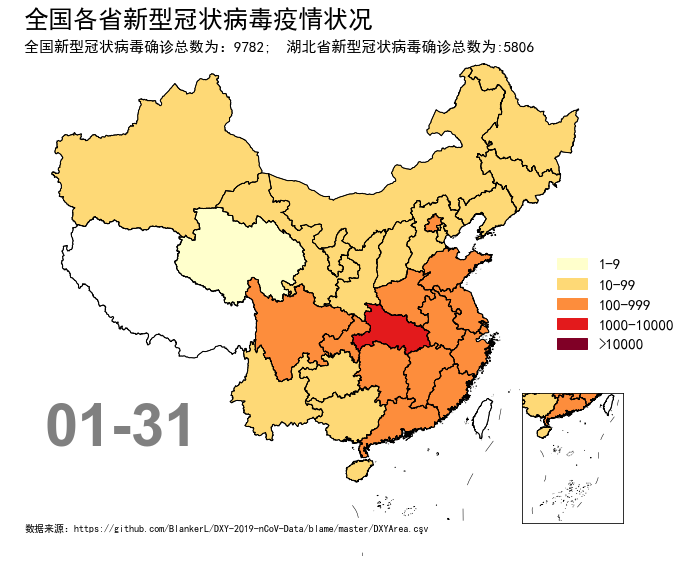

In [174]:

fig = plt.figure(figsize=(12,12))
ax = fig.gca()

basemap = Basemap(llcrnrlon= 80,llcrnrlat=10,urcrnrlon=150,urcrnrlat=50,projection='poly',lon_0 = 116.65,lat_0 = 40.02,ax = ax)
basemap.readshapefile(shapefile = 'C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china',
                      name = "province", drawbounds=True)
basemap.readshapefile('C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china_nine_dotted_line',
                       name ='section', drawbounds=True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

for info, shape in zip(basemap.province_info, basemap.province): 
        pname = info['OWNER'].strip('\x00')
        fcname = info['FCNAME'].strip('\x00')
        if pname != fcname: # 不绘制海岛
            continue
        
        color='white'
        if sum(df_day['provinceName']==pname)>0:
            color = df_day.loc[pname,'color']
        
        poly = Polygon(shape, facecolor=color, edgecolor='k')
        ax.add_patch(poly) 

patches = [ mpatches.Patch(color=color_array[i], label=labels[i]) for i in range(n_colors) ]
# put those patched as legend-handles into the legend
legend=ax.legend(handles=patches, borderaxespad=0,loc="center right",markerscale=1.3,
          edgecolor='none',facecolor='none',fontsize=15,title='')
    
ax.text(0.02,1.05, s='全国各省新型冠状病毒疫情状况', transform=ax.transAxes, size=25, color='k')
ax.text(0.02,1.0, s='全国新型冠状病毒确诊总数为：'+str(df_day['province_confirmedCount'].sum())+';  湖北省新型冠状病毒确诊总数为:'+ str(df_day.loc['湖北省','province_confirmedCount']),
        transform=ax.transAxes, size=15,weight='light', color='k')
ax.text(0.05,0.22, s=df_day['date'][0], transform=ax.transAxes, size=60, color='gray',weight='bold',family='Arial')
ax.text(0.02,0.05, s='数据来源：https://github.com/BlankerL/DXY-2019-nCoV-Data/blame/master/DXYArea.csv', transform=ax.transAxes, size=10, color='k')    
    
        
    
ax2= fig.add_axes([0.7, 0.25, 0.15, 0.15])
basemap2 = Basemap(llcrnrlon= 106.55,llcrnrlat=4.61,urcrnrlon=123.58,urcrnrlat=25.45,projection='poly',lon_0 = 116.65,lat_0 = 40.02,ax = ax2)
basemap2.readshapefile(shapefile = 'C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china',
                      name = "province", drawbounds=True)
basemap2.readshapefile('C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china_nine_dotted_line',
                       name ='section', drawbounds=True)

for info, shape in zip(basemap2.province_info, basemap2.province): 
        pname = info['OWNER'].strip('\x00')
        fcname = info['FCNAME'].strip('\x00')
        if pname != fcname: # 不绘制海岛
            continue 
            
        color='white'
        if sum(df_day['provinceName']==pname)>0:
            color = df_day.loc[pname,'color']
        poly = Polygon(shape, facecolor=color, edgecolor='k')
        ax2.add_patch(poly)
        

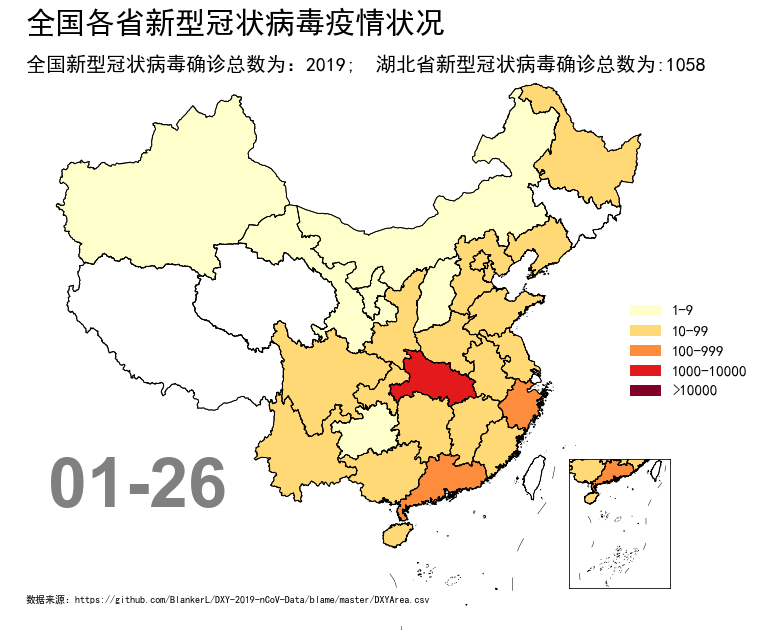

In [175]:

def draw_ChinaMap(Num_day):
    ax.clear()
    
    df_day=df_data[df_data['day']==days[Num_day]][['provinceName','province_confirmedCount','day','month','color','date']]
    
    basemap = Basemap(llcrnrlon= 80,llcrnrlat=10,urcrnrlon=150,urcrnrlat=50,projection='poly',lon_0 = 116.65,lat_0 = 40.02,ax = ax)
    basemap.readshapefile(shapefile = 'C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china',
                      name = "province", drawbounds=True)
    basemap.readshapefile('C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china_nine_dotted_line',
                       name ='section', drawbounds=True)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')


    for info, shape in zip(basemap.province_info, basemap.province): 
            pname = info['OWNER'].strip('\x00')
            fcname = info['FCNAME'].strip('\x00')
            if pname != fcname: # 不绘制海岛
                continue
        
            color='white'
            if sum(df_day['provinceName']==pname)>0:
                color = df_day.loc[pname,'color']
        
            poly = Polygon(shape, facecolor=color, edgecolor='k')
            ax.add_patch(poly) 

    patches = [ mpatches.Patch(color=color_array[i], label=labels[i]) for i in range(n_colors) ]
    # put those patched as legend-handles into the legend
    legend=ax.legend(handles=patches, borderaxespad=0,loc="center right",markerscale=1.3,
          edgecolor='none',facecolor='none',fontsize=15,title='')
    
    ax.text(0.02,1.07, s='全国各省新型冠状病毒疫情状况', transform=ax.transAxes, size=30, weight='bold',color='k')
    ax.text(0.02,1.0, s='全国新型冠状病毒确诊总数为：'+str(df_day['province_confirmedCount'].sum())+';  湖北省新型冠状病毒确诊总数为:'+ str(df_day.loc['湖北省','province_confirmedCount']),
        transform=ax.transAxes, size=20,weight='light', color='k')
    ax.text(0.05,0.22, s=df_day['date'][0], transform=ax.transAxes, size=70, color='gray',weight='bold',family='Arial')
    ax.text(0.02,0.05, s='数据来源：https://github.com/BlankerL/DXY-2019-nCoV-Data/blame/master/DXYArea.csv', transform=ax.transAxes, size=10, color='k')    
    
        
    
    basemap2 = Basemap(llcrnrlon= 106.55,llcrnrlat=4.61,urcrnrlon=123.58,urcrnrlat=25.45,projection='poly',lon_0 = 116.65,lat_0 = 40.02,ax = ax2)
    basemap2.readshapefile(shapefile = 'C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china',
                      name = "province", drawbounds=True)
    basemap2.readshapefile('C:/Users/Peter_Zhang/Desktop/Hex_Map/china_shapefiles_master/china_nine_dotted_line',
                       name ='section', drawbounds=True)

    for info, shape in zip(basemap2.province_info, basemap2.province): 
            pname = info['OWNER'].strip('\x00')
            fcname = info['FCNAME'].strip('\x00')
            if pname != fcname: # 不绘制海岛
                continue 
            
            color='white'
            if sum(df_day['provinceName']==pname)>0:
                color = df_day.loc[pname,'color']
            poly = Polygon(shape, facecolor=color, edgecolor='k')
            ax2.add_patch(poly)
        
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
ax2= fig.add_axes([0.75, 0.2, 0.15, 0.15])
plt.subplots_adjust(left=0.12, right=0.98, top=0.85, bottom=0.1)   
draw_ChinaMap(2)

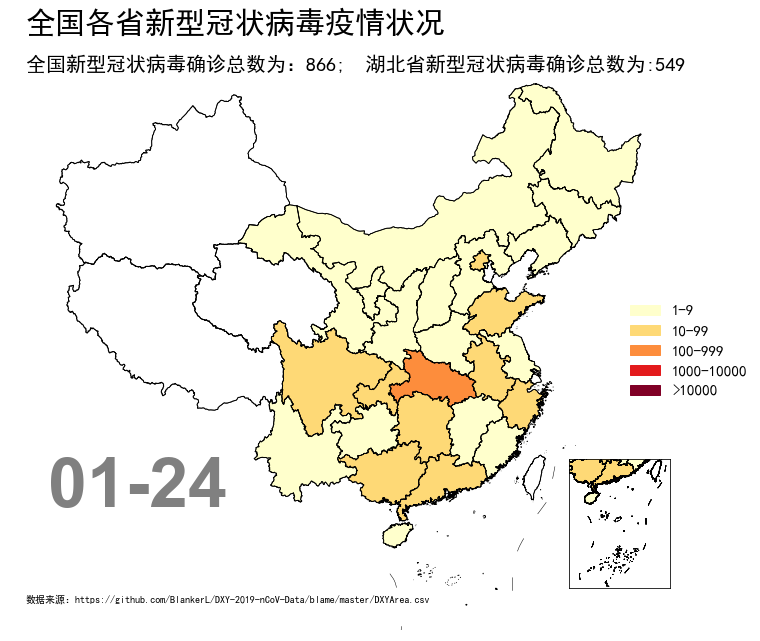

In [176]:
import matplotlib.animation as animation
from IPython.display import HTML
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
ax2= fig.add_axes([0.75, 0.2, 0.15, 0.15])
plt.subplots_adjust(left=0.12, right=0.98, top=0.85, bottom=0.1)    
animator = animation.FuncAnimation(fig, draw_ChinaMap, frames=np.arange(0,len(days),1),interval=1000)
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()